In [1]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [2]:
cd /content/content/MyDrive

/content/content/MyDrive


In [3]:
ls

'Colab Notebooks'/   recordingss.zip                         weight_cifer/
 lstm/               spoken_digit/
 recordings/         spoken_digit-20210126T005131Z-001.zip


<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [4]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model
import tensorflow as tf
import pandas as pd
import librosa
import os
##if you need any imports you can do that here. 

In [5]:
all_files = list()
data_files = os.listdir('recordings')
for i,sub_file in enumerate(data_files):
  if (sub_file.endswith("wav")):
    sub_file_path = 'recordings' + '/' + sub_file
    sub_file_path = str(sub_file_path)
    all_files.append(sub_file_path)


<font size=4>Grader function 1 </font>

In [6]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [7]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
label = [int(x[11]) for x in all_files]
label[0:5]

# intialise data of lists. 
data = {'path':all_files, 
        'label':label} 
  
# Create DataFrame 
df_audio = pd.DataFrame(data) 
df_audio.head(5)

,path,label
0,recordings/7_nicolas_39.wav,7
1,recordings/9_nicolas_32.wav,9
2,recordings/8_theo_9.wav,8
3,recordings/7_theo_20.wav,7
4,recordings/0_nicolas_8.wav,0


In [8]:
y = df_audio['label'].values

In [9]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [10]:
def grader_df():
    #flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_columns and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [11]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [12]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'],df_audio['label'] , test_size=0.3, stratify=df_audio['label'])

<font size=4>Grader function 3 </font>

In [13]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [14]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [15]:
X_train_process = [load_wav(row, get_duration=True) for row in X_train.tolist()]
X_test_process = [load_wav(row, get_duration=True) for row in X_test.tolist()]

In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train


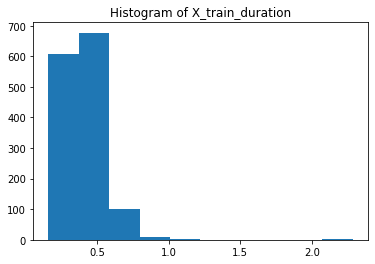

In [16]:
from matplotlib import pyplot
#plot the histogram of the duration for trian

X_train_duration  = [i[1] for i in X_train_process]
# plot scores
pyplot.hist(X_train_duration)
pyplot.title("Histogram of X_train_duration")
pyplot.show()


In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 


In [ ]:
import numpy as np
p = [0,10,20,30,40,50,60,70,80,90,100]
range =  np.percentile(X_train_duration, p)

for i , j  in enumerate(range):
  print(f'{p[i]} th percentile is {range[i]}')



0 th percentile is 0.1435374149659864
10 th percentile is 0.25988208616780045
20 th percentile is 0.30080725623582766
30 th percentile is 0.33424489795918366
40 th percentile is 0.36007256235827667
50 th percentile is 0.3915873015873016
60 th percentile is 0.418639455782313
70 th percentile is 0.44988662131519275
80 th percentile is 0.48596825396825394
90 th percentile is 0.5549160997732426
100 th percentile is 2.282766439909297


In [ ]:
##print 90 to 100 percentile values with step size of 1. 


In [ ]:
import numpy as np
p = [90,91,92,93,94,95,96,97,98,99,100]
range =  np.percentile(X_train_duration, p)

for i , j  in enumerate(range):
  print(f'{p[i]} th percentile is {range[i]}')

90 th percentile is 0.5549160997732426
91 th percentile is 0.5659854875283448
92 th percentile is 0.5779083900226759
93 th percentile is 0.5933292517006803
94 th percentile is 0.609092970521542
95 th percentile is 0.6231496598639454
96 th percentile is 0.6420553287981859
97 th percentile is 0.6635741496598639
98 th percentile is 0.6956090702947844
99 th percentile is 0.7831392290249433
100 th percentile is 2.282766439909297


In [18]:
X_trian_raw_data = [i[0] for i in X_train_process]
X_train_duration = [i[1] for i in X_train_process]

dict = {'raw_data':X_trian_raw_data , 'duration':X_train_duration}

X_train_processed = pd.DataFrame(dict)

In [19]:
X_test_raw_data = [i[0] for i in X_test_process]
X_test_duration = [i[1] for i in X_test_process]

dict = {'raw_data':X_test_raw_data , 'duration':X_test_duration}

X_test_processed = pd.DataFrame(dict)

<font size=4>Grader function 4 </font>

In [20]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [21]:
X_train_sample = [i[0] for i in X_train_processed]
X_test_sample = [i[0] for i in X_test_processed]

In [22]:
max_length  = 17640

In [23]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

In [24]:
X_train_processed.head()

,raw_data,duration
0,"[0.004544994, -0.0043530054, -0.012745843, -0....",0.422404
1,"[0.00025552875, 2.5027432e-05, 0.00012410665, ...",0.391882
2,"[-0.00746698, -0.0061093145, -0.0028450494, 0....",0.374785
3,"[-0.013037005, -0.009333977, 0.0036948763, 0.0...",0.469887
4,"[-0.0003973734, -0.00043307224, -0.00045968636...",0.318005


In [25]:
X_train_sample = X_train_processed['raw_data'].values
X_test_sample = X_test_processed['raw_data'].values

In [26]:
X_train_sample.shape,X_test_sample.shape

((1400,), (600,))

In [27]:
X_train_pad_seq = []
for li in X_train_sample:
  if len(li) < max_length:
    li = li.tolist()
    a = [0]*(max_length - len(li))
    li.extend(a)
    X_train_pad_seq.append(li)

  else:
    li = li.tolist()
    X_train_pad_seq.append(li[0:max_length])

X_train_pad_seq = np.array(X_train_pad_seq)


X_test_pad_seq = []
for li in X_test_sample:
  if len(li) < max_length:
    li = li.tolist()
    a = [0]*(max_length - len(li))
    li.extend(a)
    X_test_pad_seq.append(li)

  else:
    li = li.tolist()
    X_test_pad_seq.append(li[0:max_length])

X_test_pad_seq = np.array(X_test_pad_seq)



In [28]:
X_train_mask = np.array([(i > 0).tolist()for i in X_train_pad_seq])
X_test_mask = np.array([(i > 0).tolist()for i in X_test_pad_seq])

In [29]:
X_train_mask.dtype , X_test_mask.dtype

(dtype('bool'), dtype('bool'))

<font size=4>Grader function 5 </font>

In [30]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
    return flag_padshape
grader_padoutput()

True

In [31]:
X_train_mask = X_train_mask.astype('float')
X_test_mask = X_test_mask.astype('float')

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

In [32]:
X_train_pad_seq.shape[1]

17640

In [33]:
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

##MODEL :- 1

In [ ]:
## as discussed above, please write the LSTM

lstm = LSTM(units = 25,activation="tanh",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))

input_layer = Input(shape=(X_train_pad_seq.shape[1],1),dtype=float )
input_mask = Input(shape=(X_train_mask.shape[1],1),dtype=bool)
LSTM_layer  = lstm(inputs=input_layer,mask=input_mask)
dense = Dense(50,activation="relu",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))(LSTM_layer)
output_1 = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(dense)

model = Model(inputs = [input_layer,input_mask],outputs = output_1)
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 25)           2700        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           1300        lstm[0][0]                   

In [34]:
class f1_score_and_auc_Callback(tf.keras.callbacks.Callback):

    def  on_train_begin(self,logs={}):
      self.f1_micro=[]
      self.auc_score=[]

    def on_epoch_end(self, epoch, logs=None):
      y_pred=self.model.predict([X_test_pad_seq,X_test_mask])
      y_pred = np.argmax(y_pred, axis = 1)

      y_true=y_test
      score=f1_score(y_true, y_pred, average='micro')

      self.f1_micro.append(score)
      print(" F1 micro :",score)

metrics=f1_score_and_auc_Callback()

In [ ]:
model.fit(x=[X_train_pad_seq,X_train_mask],y=y_train,validation_data=([X_test_pad_seq,X_test_mask],y_test),
            epochs=5,batch_size=10,steps_per_epoch=len(X_train_mask)//10 , callbacks=metrics)

Epoch 1/5
140/140 [==============================] - 63s 227ms/step - loss: 2.3092 - accuracy: 0.1023 - val_loss: 2.3015 - val_accuracy: 0.0917
 F1 micro : 0.10499999999999998
Epoch 2/5
140/140 [==============================] - 30s 217ms/step - loss: 2.2991 - accuracy: 0.0888 - val_loss: 2.2991 - val_accuracy: 0.1400
 F1 micro : 0.115
Epoch 3/5
140/140 [==============================] - 31s 218ms/step - loss: 2.2981 - accuracy: 0.1119 - val_loss: 2.2984 - val_accuracy: 0.1100
 F1 micro : 0.095
Epoch 4/5
140/140 [==============================] - 30s 217ms/step - loss: 2.2939 - accuracy: 0.1097 - val_loss: 2.2948 - val_accuracy: 0.1317
 F1 micro : 0.10333333333333333
Epoch 5/5
140/140 [==============================] - 30s 218ms/step - loss: 2.2918 - accuracy: 0.1166 - val_loss: 2.2915 - val_accuracy: 0.1250
 F1 micro : 0.09333333333333334


### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [35]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [36]:
X_train_spectrogram = [convert_to_spectrogram(row) for row in X_train_pad_seq]
X_train_spectrogram = np.array(X_train_spectrogram)

X_test_spectrogram = [convert_to_spectrogram(row) for row in X_test_pad_seq]
X_test_spectrogram = np.array(X_test_spectrogram)

In [ ]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)


<font size=4>Grader function 6 </font>

In [37]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

##MODEL :- 2

In [45]:
class f1_score_and_auc_Callback(tf.keras.callbacks.Callback):

    def  on_train_begin(self,logs={}):
      self.f1_micro=[]
      self.auc_score=[]

    def on_epoch_end(self, epoch, logs=None):
      y_pred=self.model.predict(X_test_spectrogram)
      y_pred = np.argmax(y_pred, axis = 1)

      y_true=y_test
      score=f1_score(y_true, y_pred, average='micro')
  

      self.f1_micro.append(score)
      print(" F1 micro :",score)
    

metrics1=f1_score_and_auc_Callback()

In [38]:
## as discussed above, please write the LSTM

lstm = LSTM(units = 100,activation="tanh",kernel_initializer=tf.keras.initializers.he_uniform(seed=0),return_sequences=True)

input_layer = Input(shape=(X_test_spectrogram[0].shape),dtype=float)
LSTM_layer  = lstm(inputs=input_layer)
glo_avg = tf.keras.layers.GlobalAveragePooling1D(data_format='channels_first')(LSTM_layer)
dense = Dense(50,activation="relu",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))(glo_avg)
output_1 = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(dense)

model = Model(inputs = [input_layer],outputs = output_1)
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 100)           54400     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 58,160
Trainable params: 58,160
Non-trainable params: 0
_________________________________________________________________


In [42]:
X_train_spectrogram.shape , X_test_spectrogram.shape ,y_train.shape,y_test.shape


((1400, 64, 35), (600, 64, 35), (1400,), (600,))

In [46]:
model.fit(x=X_train_spectrogram,y=y_train,validation_data=(X_test_spectrogram,y_test),
            epochs=60,batch_size=10,steps_per_epoch=len(X_train_spectrogram)//10, callbacks=metrics1)

Epoch 1/60
140/140 [==============================] - 1s 6ms/step - loss: 2.0538 - accuracy: 0.2607 - val_loss: 1.8639 - val_accuracy: 0.3667
 F1 micro : 0.36666666666666664
Epoch 2/60
140/140 [==============================] - 1s 6ms/step - loss: 1.6948 - accuracy: 0.4371 - val_loss: 1.5437 - val_accuracy: 0.4650
 F1 micro : 0.465
Epoch 3/60
140/140 [==============================] - 1s 6ms/step - loss: 1.4344 - accuracy: 0.5150 - val_loss: 1.4146 - val_accuracy: 0.5200
 F1 micro : 0.52
Epoch 4/60
140/140 [==============================] - 1s 6ms/step - loss: 1.2568 - accuracy: 0.6050 - val_loss: 1.1972 - val_accuracy: 0.6400
 F1 micro : 0.64
Epoch 5/60
140/140 [==============================] - 1s 6ms/step - loss: 1.1125 - accuracy: 0.6621 - val_loss: 1.0655 - val_accuracy: 0.6500
 F1 micro : 0.65
Epoch 6/60
140/140 [==============================] - 1s 6ms/step - loss: 1.0267 - accuracy: 0.6850 - val_loss: 0.9794 - val_accuracy: 0.7017
 F1 micro : 0.7016666666666667
Epoch 7/60
140/1

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [47]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [48]:
x_train_data_aug = []

for path in X_train:
  aug_temp = generate_augmented_data(path)
  x_train_data_aug.extend(aug_temp)

x_train_data_aug = np.array(x_train_data_aug)

y_train_data_aug = []

for i in y_train:
  c = [i]*9
  y_train_data_aug.extend(c)

y_train_data_aug = np.array(y_train_data_aug)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [49]:
X_train_pad_seq1 = []
for li in x_train_data_aug:
  if len(li) < max_length:
    li = li.tolist()
    a = [0]*(max_length - len(li))
    li.extend(a)
    X_train_pad_seq1.append(li)

  else:
    li = li.tolist()
    X_train_pad_seq1.append(li[0:max_length])

X_train_pad_seq1 = np.array(X_train_pad_seq1)

In [50]:
X_train_mask1 = np.array([(i > 0).tolist()for i in X_train_pad_seq1])

##MODEL :- 3

In [51]:
## as discussed above, please write the LSTM

lstm = LSTM(units = 100,activation="tanh",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))

input_layer = Input(shape=(X_train_pad_seq.shape[1],1),dtype=float)
input_mask = Input(shape=(X_train_mask.shape[1],1),dtype=bool)
LSTM_layer  = lstm(inputs=input_layer,mask=input_mask)
dense = Dense(50,activation="relu",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))(LSTM_layer)
output_1 = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(dense)

model = Model(inputs = [input_layer,input_mask],outputs = output_1)
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 100)          40800       input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 50)           5050        lstm_2[0][0]               

In [52]:
X_train_pad_seq1.shape, X_train_mask1.shape, y_train_data_aug.shape

((12600, 17640), (12600, 17640), (12600,))

In [53]:
X_test_pad_seq.shape,X_test_mask.shape,y_test.shape

((600, 17640), (600, 17640), (600,))

In [54]:
model.fit(x=[X_train_pad_seq1,X_train_mask1],y=y_train_data_aug,validation_data=([X_test_pad_seq,X_test_mask],y_test),
            epochs=2,batch_size=10,steps_per_epoch=len(X_train_mask)//10 , callbacks=metrics)

Epoch 1/2
140/140 [==============================] - 44s 298ms/step - loss: 2.3046 - accuracy: 0.1150 - val_loss: 2.3017 - val_accuracy: 0.1033
 F1 micro : 0.10000000000000002
Epoch 2/2
140/140 [==============================] - 41s 291ms/step - loss: 2.3012 - accuracy: 0.1155 - val_loss: 2.2994 - val_accuracy: 0.1250
 F1 micro : 0.10000000000000002


As discussed above, for one data point, we will get 9 augmented data points.  

Split data into train and test (80-20 split)

We have 2000 data points(1600 train points, 400 test points) 

Do augmentation only on train data, after augmentation we will get 14400 train points. 

do the above steps i.e training with raw data and spectrogram data with augmentation.

##MODEL :- 4

In [55]:
X_train_spectrogram1 = [convert_to_spectrogram(row) for row in X_train_pad_seq1]
X_train_spectrogram1 = np.array(X_train_spectrogram1)

X_test_spectrogram = [convert_to_spectrogram(row) for row in X_test_pad_seq]
X_test_spectrogram = np.array(X_test_spectrogram)

In [56]:
## as discussed above, please write the LSTM

lstm = LSTM(units = 100,activation="tanh",kernel_initializer=tf.keras.initializers.he_uniform(seed=0),return_sequences=True)

input_layer = Input(shape=(X_test_spectrogram[0].shape),dtype=float)
LSTM_layer  = lstm(inputs=input_layer)
glo_avg = tf.keras.layers.GlobalAveragePooling1D(data_format='channels_first')(LSTM_layer)
dense = Dense(50,activation="relu",kernel_initializer=tf.keras.initializers.he_uniform(seed=0))(glo_avg)
output_1 = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(dense)

model = Model(inputs = [input_layer],outputs = output_1)
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64, 100)           54400     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 58,160
Trainable params: 58,160
Non-trainable params: 0
_________________________________________________________________


In [57]:
X_train_spectrogram1.shape , X_test_spectrogram.shape ,y_train_data_aug.shape,y_test.shape

((12600, 64, 35), (600, 64, 35), (12600,), (600,))

In [59]:
model.fit(x=X_train_spectrogram1,y=y_train_data_aug,validation_data=(X_test_spectrogram,y_test),
            epochs=60,batch_size=10,steps_per_epoch=len(X_train_spectrogram1)//10, callbacks=metrics1)

Epoch 1/60
1260/1260 [==============================] - 6s 5ms/step - loss: 0.8588 - accuracy: 0.7082 - val_loss: 0.6784 - val_accuracy: 0.7700
 F1 micro : 0.7699999999999999
Epoch 2/60
1260/1260 [==============================] - 6s 5ms/step - loss: 0.6708 - accuracy: 0.7670 - val_loss: 0.5384 - val_accuracy: 0.8433
 F1 micro : 0.8433333333333335
Epoch 3/60
1260/1260 [==============================] - 6s 5ms/step - loss: 0.5804 - accuracy: 0.7985 - val_loss: 0.5305 - val_accuracy: 0.8183
 F1 micro : 0.8183333333333332
Epoch 4/60
1260/1260 [==============================] - 6s 5ms/step - loss: 0.5177 - accuracy: 0.8254 - val_loss: 0.4310 - val_accuracy: 0.8733
 F1 micro : 0.8733333333333333
Epoch 5/60
1260/1260 [==============================] - 6s 4ms/step - loss: 0.4789 - accuracy: 0.8363 - val_loss: 0.4122 - val_accuracy: 0.8667
 F1 micro : 0.8666666666666667
Epoch 6/60
1260/1260 [==============================] - 6s 5ms/step - loss: 0.4582 - accuracy: 0.8421 - val_loss: 0.3508 - va